# Importing the Important Libraries

In [1]:
import pandas as pd
import numpy as np
import keras 
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

C:\Users\Robinhood\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Loading the Dataset

# Loading the Dataset

In [2]:
dataset=pd.read_csv("data.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Preprocessing

In [3]:
dataset.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
dataset.shape
dataset['diagnosis']=dataset['diagnosis'].map({"M": 1,"B": 0})
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
dataset.info()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Exploratory Data Analysis

In [5]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [6]:
dataset.groupby("diagnosis").mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


# Data Visualisation

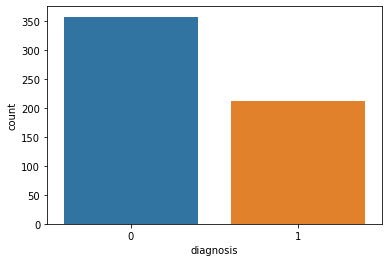

In [7]:
sns.countplot(dataset["diagnosis"], label="Count")

# Generating a scatter plot with columns

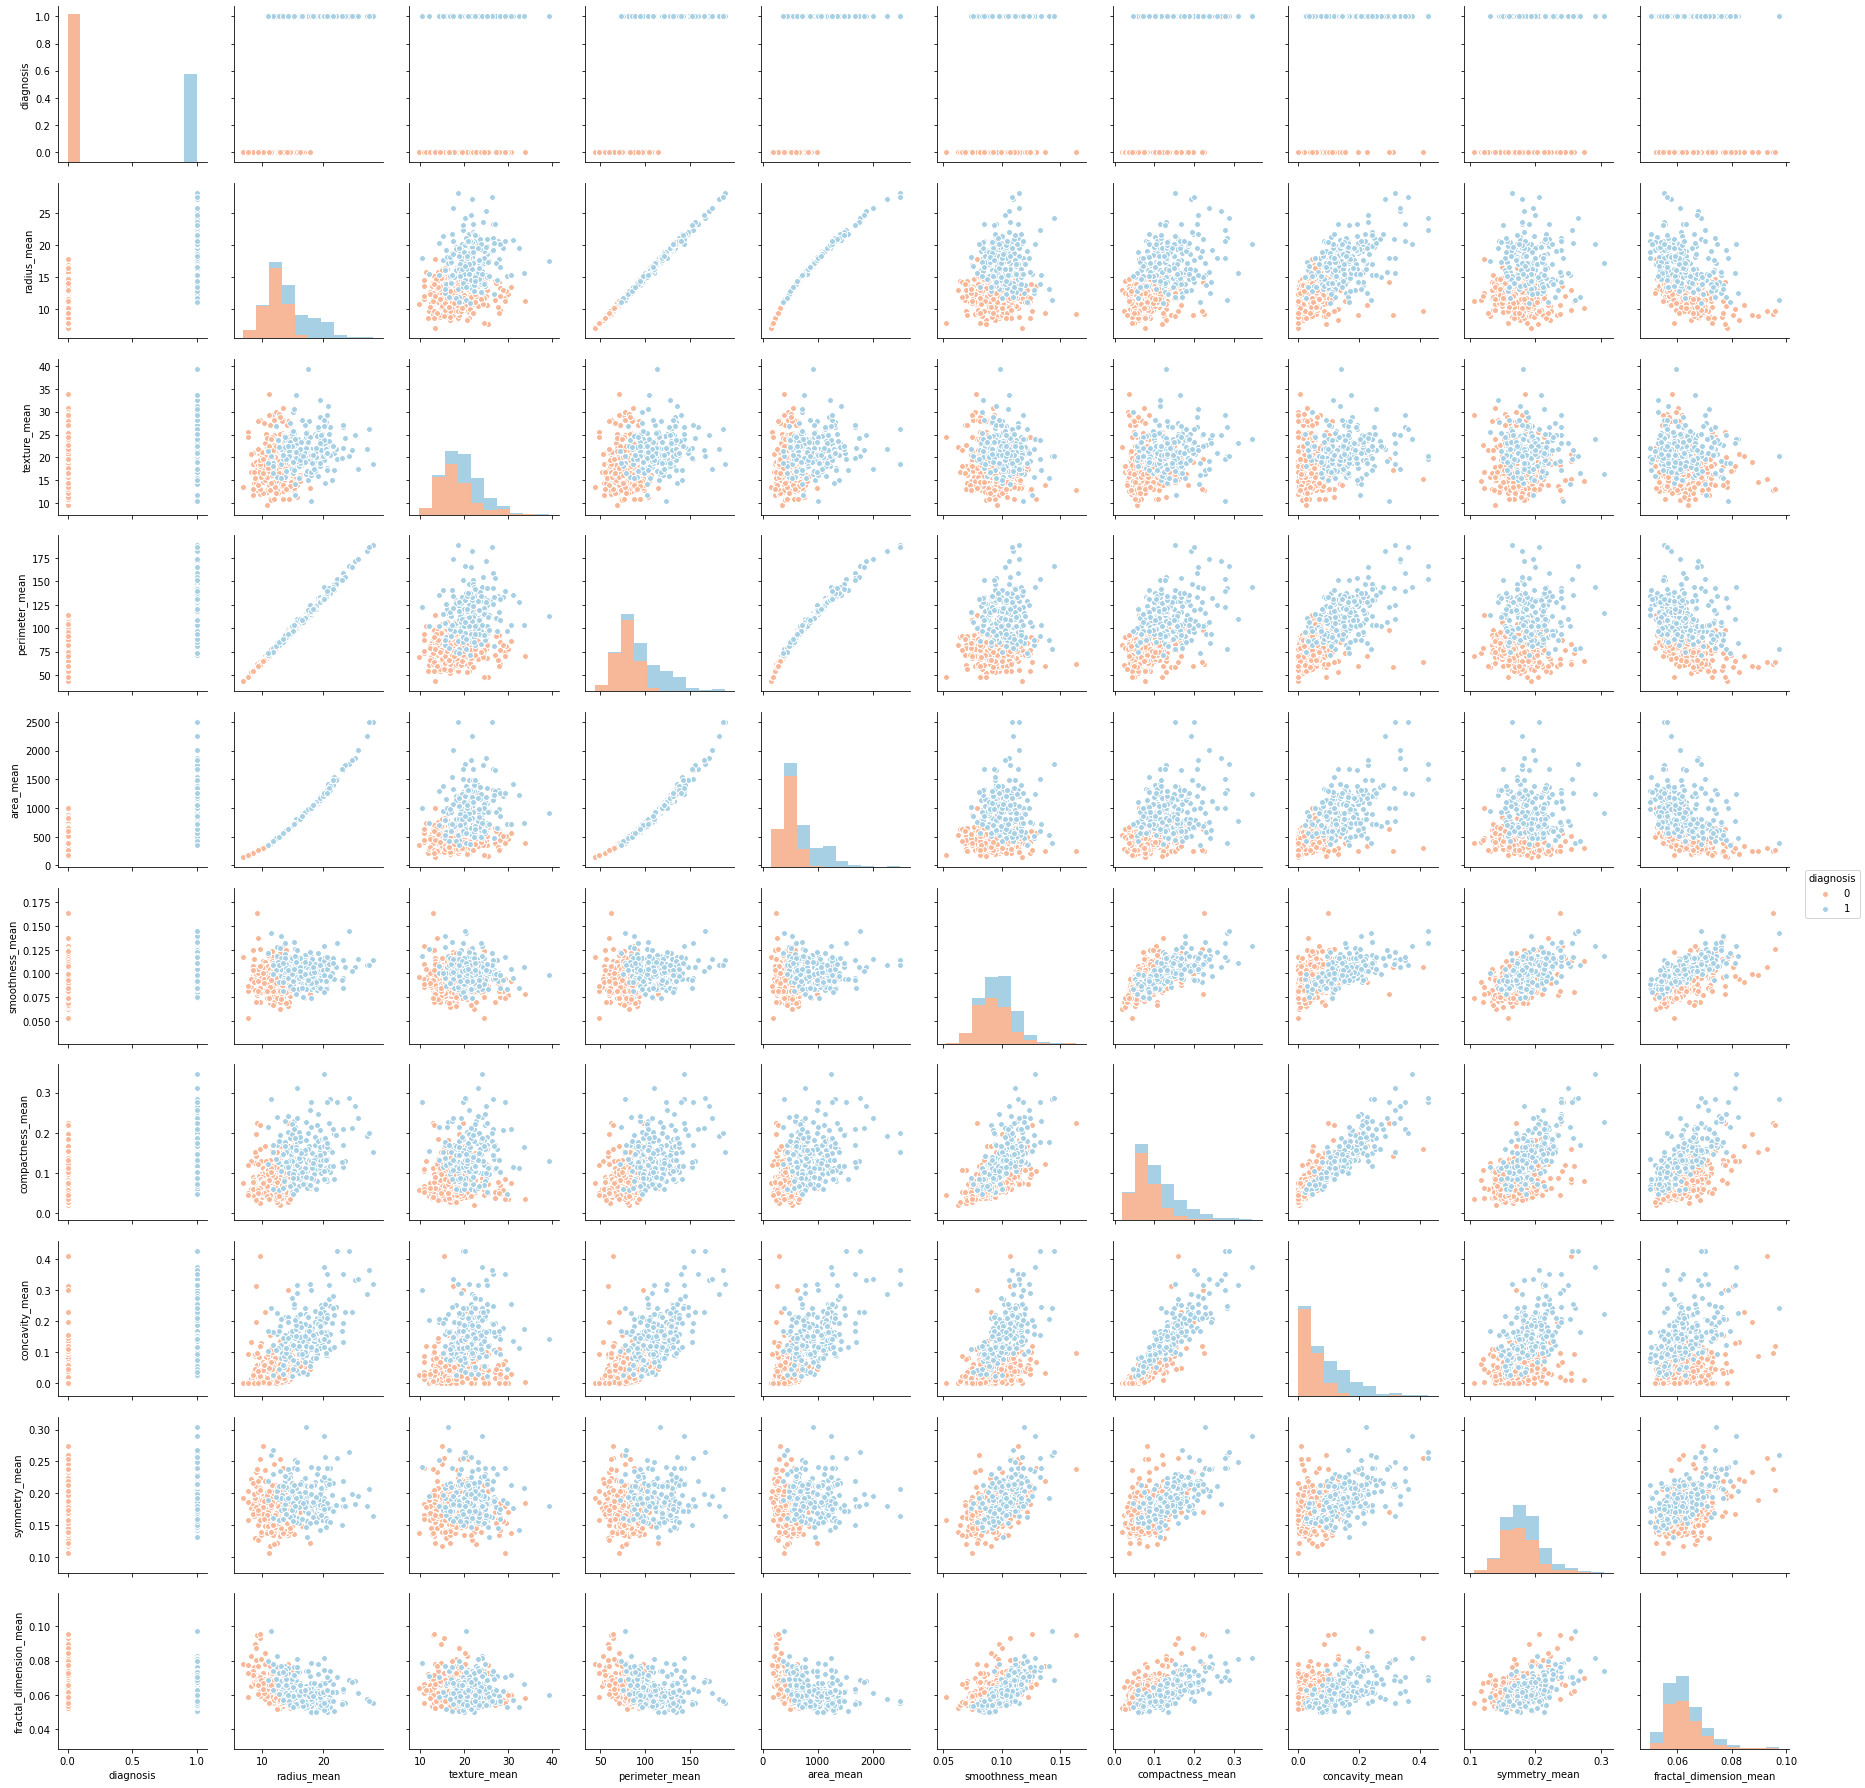

In [8]:
cols=['diagnosis',
     'radius_mean',
     'texture_mean',
     'perimeter_mean',
     'area_mean',
     'smoothness_mean',
     'compactness_mean',
     'concavity_mean',
     'symmetry_mean',
     'fractal_dimension_mean']

sns.pairplot(data = dataset[cols], hue='diagnosis', palette='RdBu')

# Checking the correlation

In [9]:
dataset.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


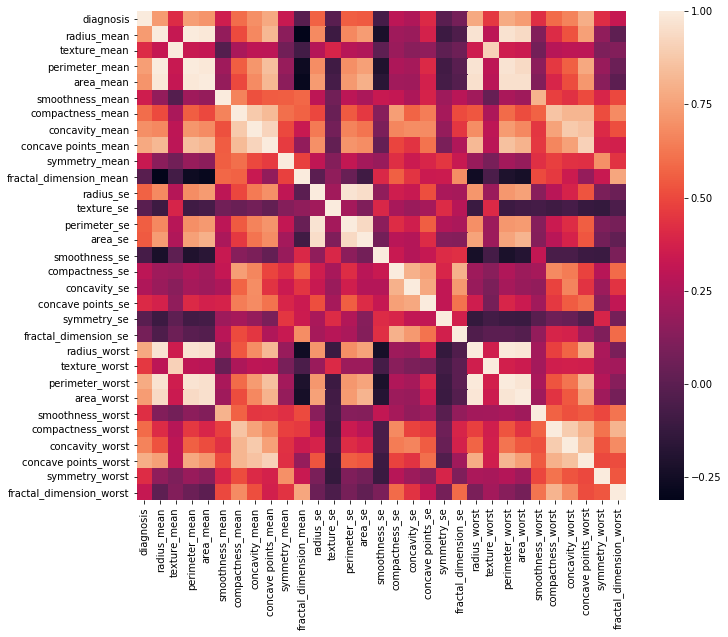

In [10]:
corrmat=dataset.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,square=True)

In [11]:
X=dataset.drop("diagnosis",axis=1)
y=dataset["diagnosis"]

# Splitting the Dataset

In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42 )

C:\Users\Robinhood\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Building an ANN Model with 1 Dense Layer

In [13]:
model=Sequential()
model.add(Dense(30, input_dim=30, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


# Training an ANN Model

In [14]:
history=model.fit(X_train, y_train, validation_split=0.1, epochs=1000, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 358 samples, validate on 40 samples
Epoch 1/1000
358/358 [==============================] - 3s 7ms/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 2/1000
358/358 [==============================] - 0s 131us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 3/1000
358/358 [==============================] - 0s 112us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 4/1000
358/358 [==============================] - 0s 125us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 5/1000
358/358 [==============================] - 0s 123us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 6/1000
358/358 [==============================] - 0s 140us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 7/1000
358/358 [==============================] - 0s 112us/step - loss: 9.7970 - 

358/358 [==============================] - 0s 79us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 59/1000
358/358 [==============================] - 0s 121us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 60/1000
358/358 [==============================] - 0s 127us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 61/1000
358/358 [==============================] - 0s 131us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 62/1000
358/358 [==============================] - 0s 121us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 63/1000
358/358 [==============================] - 0s 131us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 64/1000
358/358 [==============================] - 0s 149us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 65/1000
358/358 [==========================

358/358 [==============================] - 0s 143us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 118/1000
358/358 [==============================] - 0s 129us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 119/1000
358/358 [==============================] - 0s 126us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 120/1000
358/358 [==============================] - 0s 114us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 121/1000
358/358 [==============================] - 0s 125us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 122/1000
358/358 [==============================] - 0s 166us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 123/1000
358/358 [==============================] - 0s 156us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 124/1000
358/358 [==================

358/358 [==============================] - 0s 156us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 176/1000
358/358 [==============================] - 0s 134us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 177/1000
358/358 [==============================] - 0s 134us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 178/1000
358/358 [==============================] - 0s 271us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 179/1000
358/358 [==============================] - 0s 263us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 180/1000
358/358 [==============================] - 0s 218us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 181/1000
358/358 [==============================] - 0s 246us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 182/1000
358/358 [==================

358/358 [==============================] - 0s 112us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 235/1000
358/358 [==============================] - 0s 102us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 236/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 237/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 238/1000
358/358 [==============================] - 0s 129us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 239/1000
358/358 [==============================] - 0s 136us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 240/1000
358/358 [==============================] - 0s 156us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 241/1000
358/358 [==================

Epoch 293/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 294/1000
358/358 [==============================] - 0s 136us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 295/1000
358/358 [==============================] - 0s 142us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 296/1000
358/358 [==============================] - 0s 119us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 297/1000
358/358 [==============================] - 0s 136us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 298/1000
358/358 [==============================] - 0s 117us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 299/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 300/1000
358/358 [===

358/358 [==============================] - 0s 171us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 352/1000
358/358 [==============================] - 0s 134us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 353/1000
358/358 [==============================] - 0s 164us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 354/1000
358/358 [==============================] - 0s 134us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 355/1000
358/358 [==============================] - 0s 145us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 356/1000
358/358 [==============================] - 0s 228us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 357/1000
358/358 [==============================] - 0s 139us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 358/1000
358/358 [==================

Epoch 410/1000
358/358 [==============================] - 0s 156us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 411/1000
358/358 [==============================] - 0s 241us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 412/1000
358/358 [==============================] - 0s 156us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 413/1000
358/358 [==============================] - 0s 141us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 414/1000
358/358 [==============================] - 0s 286us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 415/1000
358/358 [==============================] - ETA: 0s - loss: 10.5867 - acc: 0.33 - 0s 342us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 416/1000
358/358 [==============================] - 0s 156us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_a

358/358 [==============================] - 0s 162us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 469/1000
358/358 [==============================] - 0s 139us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 470/1000
358/358 [==============================] - 0s 117us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 471/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 472/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 473/1000
358/358 [==============================] - 0s 96us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 474/1000
358/358 [==============================] - 0s 121us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 475/1000
358/358 [===================

358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 528/1000
358/358 [==============================] - 0s 214us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 529/1000
358/358 [==============================] - 0s 134us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 530/1000
358/358 [==============================] - 0s 112us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 531/1000
358/358 [==============================] - 0s 144us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 532/1000
358/358 [==============================] - 0s 193us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 533/1000
358/358 [==============================] - 0s 119us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 534/1000
358/358 [==================

Epoch 586/1000
358/358 [==============================] - 0s 125us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 587/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 588/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 589/1000
358/358 [==============================] - 0s 125us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 590/1000
358/358 [==============================] - 0s 108us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 591/1000
358/358 [==============================] - 0s 114us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 592/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 593/1000
358/358 [===

Epoch 645/1000
358/358 [==============================] - 0s 128us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 646/1000
358/358 [==============================] - 0s 112us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 647/1000
358/358 [==============================] - 0s 141us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 648/1000
358/358 [==============================] - 0s 142us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 649/1000
358/358 [==============================] - 0s 141us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 650/1000
358/358 [==============================] - 0s 226us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 651/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 652/1000
358/358 [===

358/358 [==============================] - 0s 171us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 704/1000
358/358 [==============================] - 0s 141us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 705/1000
358/358 [==============================] - 0s 142us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 706/1000
358/358 [==============================] - 0s 142us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 707/1000
358/358 [==============================] - 0s 114us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 708/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 709/1000
358/358 [==============================] - 0s 165us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 710/1000
358/358 [==================

358/358 [==============================] - 0s 123us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 763/1000
358/358 [==============================] - 0s 123us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 764/1000
358/358 [==============================] - 0s 112us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 765/1000
358/358 [==============================] - 0s 145us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 766/1000
358/358 [==============================] - 0s 112us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 767/1000
358/358 [==============================] - 0s 109us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 768/1000
358/358 [==============================] - 0s 136us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 769/1000
358/358 [==================

358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 822/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 823/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 824/1000
358/358 [==============================] - 0s 146us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 825/1000
358/358 [==============================] - 0s 222us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 826/1000
358/358 [==============================] - 0s 119us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 827/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 828/1000
358/358 [==================

Epoch 880/1000
358/358 [==============================] - 0s 147us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 881/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 882/1000
358/358 [==============================] - 0s 119us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 883/1000
358/358 [==============================] - 0s 114us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 884/1000
358/358 [==============================] - 0s 136us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 885/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 886/1000
358/358 [==============================] - 0s 142us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 887/1000
358/358 [===

358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 939/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 940/1000
358/358 [==============================] - 0s 135us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 941/1000
358/358 [==============================] - 0s 107us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 942/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 943/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 944/1000
358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 945/1000
358/358 [==================

358/358 [==============================] - 0s 113us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 998/1000
358/358 [==============================] - 0s 104us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 999/1000
358/358 [==============================] - 0s 107us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750
Epoch 1000/1000
358/358 [==============================] - 0s 114us/step - loss: 9.7970 - acc: 0.3855 - val_loss: 11.5582 - val_acc: 0.2750


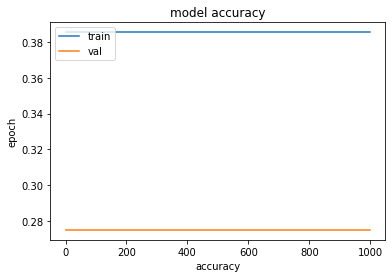

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

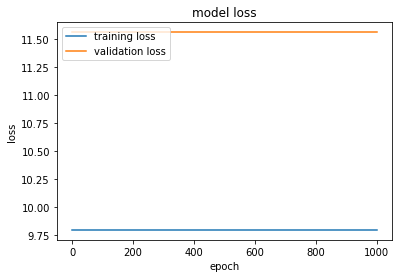

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'], loc='upper left')
plt.show()

# Accuracy of the Dataset

In [17]:
_,accuracy=model.evaluate(X_train, y_train)
print("Accuracy:%.2f"%(accuracy*100))

398/398 [==============================] - 0s 51us/step
Accuracy:37.44


# Calculating F-1 score

In [18]:
test_loss=model.evaluate(X_test, y_test, verbose=0)

# Calculate evaluation Parameters
f1=f1_score(y_test, model.predict_classes(X_test), average='micro')

stats=pd.DataFrame({'Test accuracy':
                   round(test_loss[1]*100,3),
                   'F1 Score' : round(f1,3),
                   'Total Loss': round(test_loss[0],3)},
                  index=[0])

display(stats)

,Test accuracy,F1 Score,Total Loss
0,36.842,0.368,10.069
